In [4]:
import pandas as pd
import numpy as np
import matplotlib

In [5]:
vader_all= pd.read_csv('../Data-Processed/all_vader.csv', index_col=0)
vader_all = vader_all.replace(np.nan,0)
vader_all.head()

,AAPL,META,TSLA,World,Politics,Coronavirus
Date,,,,,,
2018-01-24,0.0,0.0,0.000,0.0,0.0,0.0
2018-01-25,0.0,0.0,0.075,0.0,0.0,0.0
2018-01-26,0.0,0.0,-0.216,0.0,0.0,0.0
2018-01-28,0.0,0.0,-0.138,0.0,0.0,0.0
2018-01-29,0.0,0.0,-0.190,0.0,0.0,0.0


In [6]:
flair_all= pd.read_csv('../Data-Processed/all_flair.csv', index_col=0)
flair_all = flair_all.replace(np.nan,0)
flair_all.head()

,AAPL,META,TSLA,World,Politics,Coronavirus
Date,,,,,,
2018-01-24,0.0,0.0,-0.320115,0.0,0.0,0.0
2018-01-25,0.0,0.0,-0.949072,0.0,0.0,0.0
2018-01-26,0.0,0.0,-0.976673,0.0,0.0,0.0
2018-01-28,0.0,0.0,-0.998768,0.0,0.0,0.0
2018-01-29,0.0,0.0,-0.886453,0.0,0.0,0.0


array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

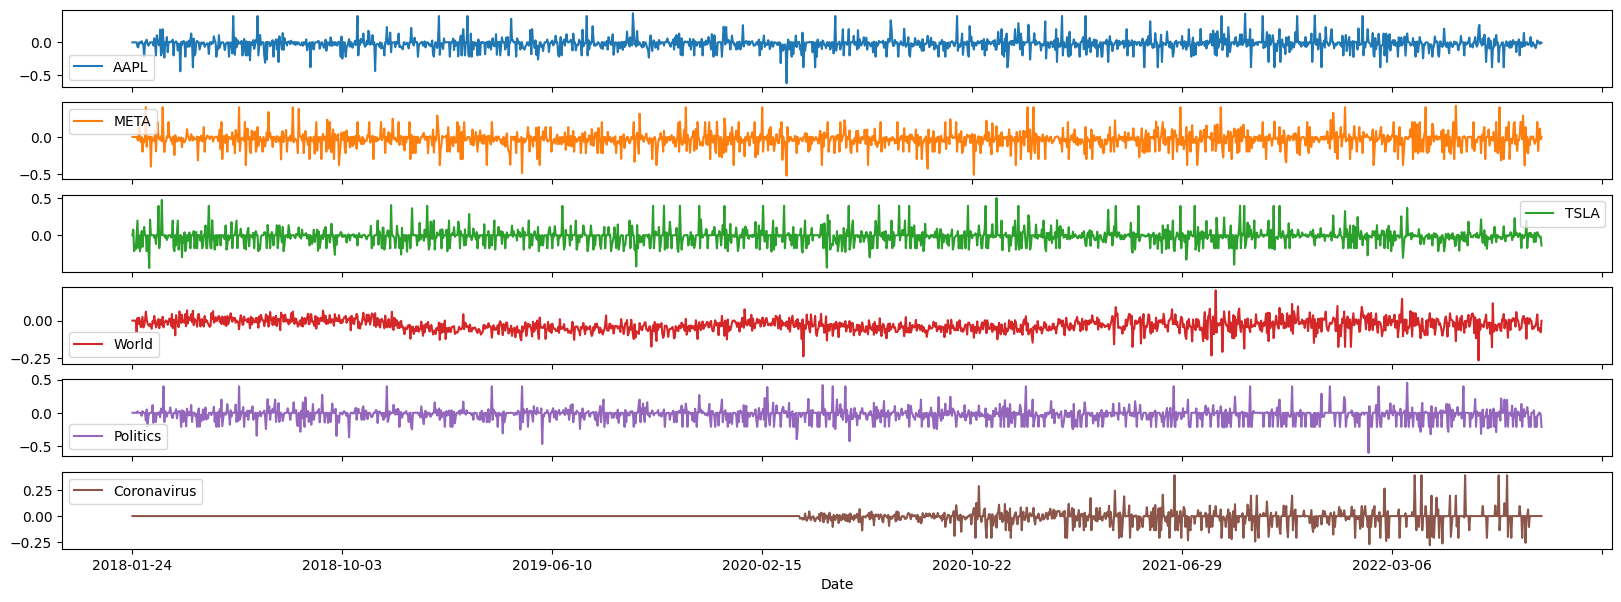

In [7]:
vader_all.plot(figsize=(20,7),subplots=True)

array([<AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>,
       <AxesSubplot: xlabel='Date'>, <AxesSubplot: xlabel='Date'>],
      dtype=object)

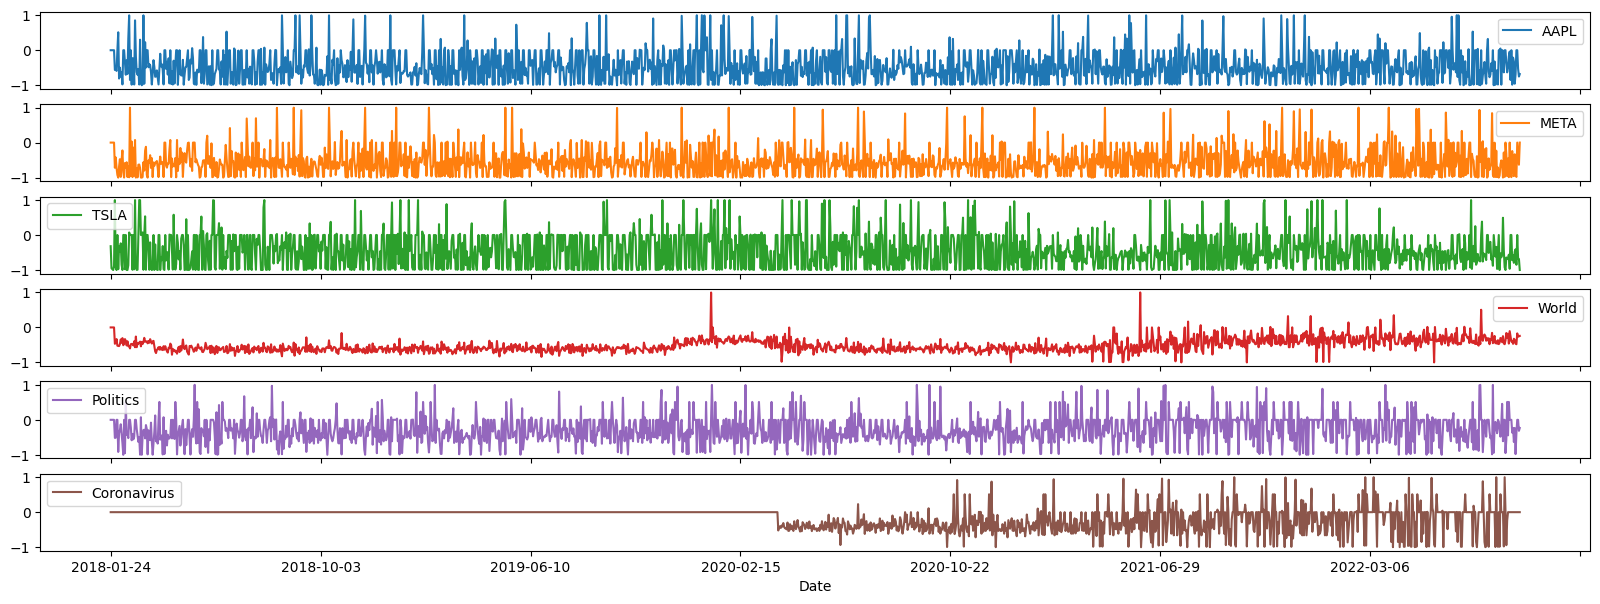

In [8]:
flair_all.plot(figsize=(20,7),subplots=True)

In [9]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
# Define the instruments to download. We would like to see Apple, Microsoft and the S&P500 index.
tickers = ['AAPL', 'META', 'TSLA']

# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '2018-01-31'
end_date = '2022-09-30'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader(tickers, 'yahoo', start_date, end_date)

In [15]:
stock_df = pd.DataFrame(panel_data)
stock_df.head()

Attributes  Adj Close                             Close              \
Symbols          AAPL        META       TSLA       AAPL        META   
Date                                                                  
2018-01-30  39.758774  187.119995  23.054667  41.742500  187.119995   
2018-01-31  39.868309  186.889999  23.620667  41.857498  186.889999   
2018-02-01  39.951653  193.089996  23.283333  41.945000  193.089996   
2018-02-02  38.218147  190.279999  22.916668  40.125000  190.279999   
2018-02-05  37.263287  181.259995  22.208668  39.122501  181.259995   

Attributes                  High                               Low  \
Symbols          TSLA       AAPL        META       TSLA       AAPL   
Date                                                                 
2018-01-30  23.054667  41.842499  188.179993  23.218000  41.174999   
2018-01-31  23.620667  42.110001  189.830002  23.746000  41.625000   
2018-02-01  23.283333  42.154999  195.320007  23.977333  41.689999   
2018-02-02  22.916668  41.700001  194.210007  23.463333  40.025002   
2018-02-05  22.208668  40.970001  190.610001  22.964666  39.000000   

Attributes                              Open                         \
Symbols           META       TSLA       AAPL        META       TSLA   
Date                                                                  
2018-01-30  181.839996  22.811333  41.382500  187.619995  23.009333   
2018-01-31  185.220001  23.012667  41.717499  188.369995  23.167334   
2018-02-01  187.889999  23.242001  41.792500  188.220001  23.400000   
2018-02-02  189.979996  22.700666  41.500000  192.039993  23.229334   
2018-02-05  180.610001  22.200001  39.775002  186.929993  22.531334   

Attributes       Volume                          
Symbols            AAPL        META        TSLA  
Date                                             
2018-01-30  184192800.0  20858600.0  70765500.0  
2018-01-31  129915600.0  43275100.0  93211500.0  
2018-02-01  188923200.0  54211300.0  62965500.0  
2018-02-02  346375200.0  26677500.0  55572000.0  
2018-02-05  290954000.0  33128200.0  66961500.0

In [32]:
# to remove missing data from some days and getting weekdays with keyword freq=B

close = panel_data['Close']
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')
close = close.reindex(all_weekdays)
close = close.fillna(method='ffill')

In [33]:
close.head()

Symbols,AAPL,META,TSLA
2018-01-31,41.857498,186.889999,23.620667
2018-02-01,41.945000,193.089996,23.283333
2018-02-02,40.125000,190.279999,22.916668
2018-02-05,39.122501,181.259995,22.208668
2018-02-06,40.757500,185.309998,22.264668


In [34]:
close.describe()

Symbols,AAPL,META,TSLA
count,1218.000000,1218.000000,1218.000000
mean,96.584766,223.708851,130.591357
std,46.206560,64.785302,120.141867
min,35.547501,124.059998,11.931333
25%,50.965000,175.190002,20.705833
50%,81.258751,198.840004,59.505333
75%,140.887505,270.472504,238.262501
max,182.009995,382.179993,409.970001


In [35]:
# closingPrices: a Pandas Dataframe of closing prices
# returns a list of returns
def getReturns(closingPrices):
      return closingPrices.diff()[1:].div(closingPrices[:-1])
returns = getReturns(close)


In [36]:
returns.head()

Symbols,AAPL,META,TSLA
2018-01-31,NaN,NaN,NaN
2018-02-01,0.002086,0.032109,-0.014488
2018-02-02,-0.045358,-0.014768,-0.016000
2018-02-05,-0.025625,-0.049763,-0.031879
2018-02-06,0.040115,0.021855,0.002515


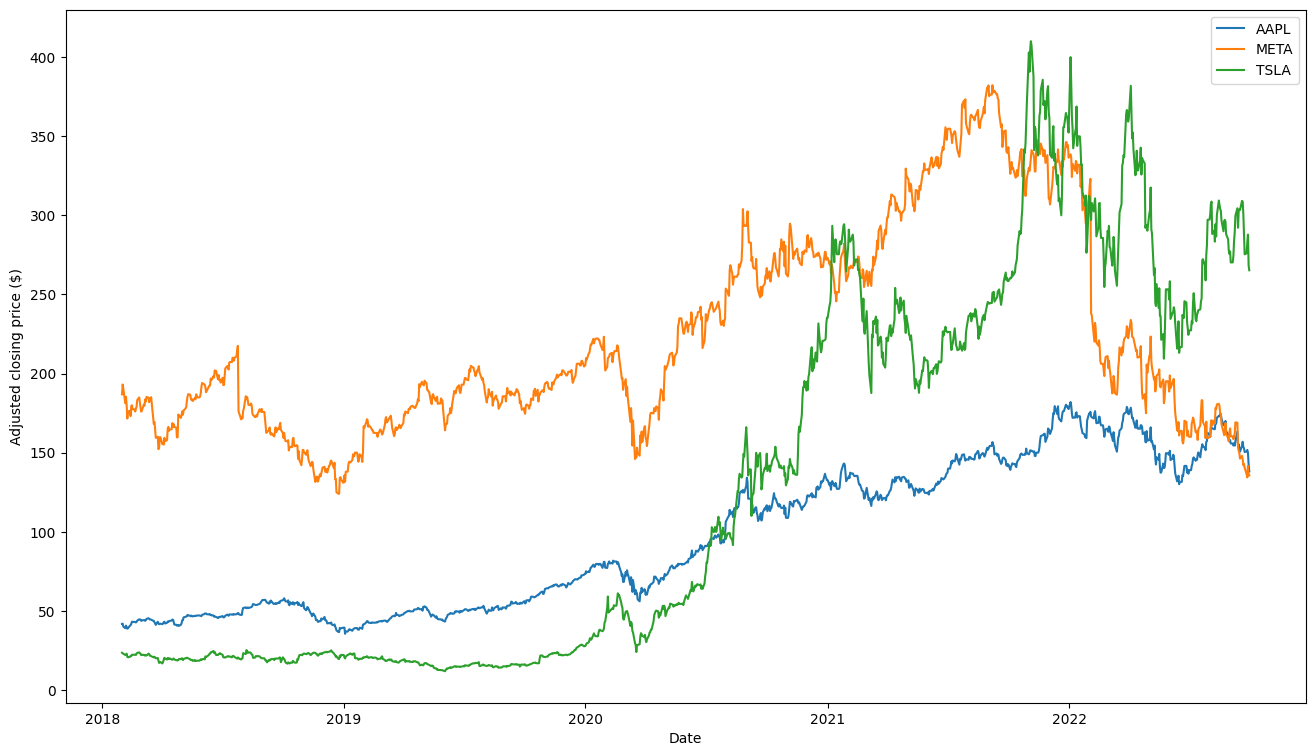

In [40]:
# Get timeseries. This now returns a Pandas Series object indexed by date.
aapl = close.loc[:, 'AAPL']
meta = close.loc[:, 'META']
tsla = close.loc[:, 'TSLA']

# Calculate the 20 and 100 days moving averages of the closing prices
# short_rolling_aapl = aapl.rolling(window=20).mean()
# long_rolling_aapl = aapl.rolling(window=100).mean()
# short_rolling_meta = meta.rolling(window=20).mean()
# long_rolling_meta = meta.rolling(window=100).mean()
# short_rolling_tsla = tsla.rolling(window=20).mean()
# long_rolling_tsla = tsla.rolling(window=100).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(aapl.index, aapl, label='AAPL')
ax.plot(meta.index, meta, label='META')
ax.plot(tsla.index, tsla, label='TSLA')
# ax.plot(short_rolling_aapl.index, short_rolling_aapl, label='20 days rolling')
# ax.plot(long_rolling_aapl.index, long_rolling_aapl, label='100 days rolling')
# ax.plot(short_rolling_meta.index, short_rolling_meta, label='20 days rolling')
# ax.plot(long_rolling_meta.index, long_rolling_meta, label='100 days rolling')
# ax.plot(short_rolling_tsla.index, short_rolling_tsla, label='20 days rolling')
# ax.plot(long_rolling_tsla.index, long_rolling_tsla, label='100 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

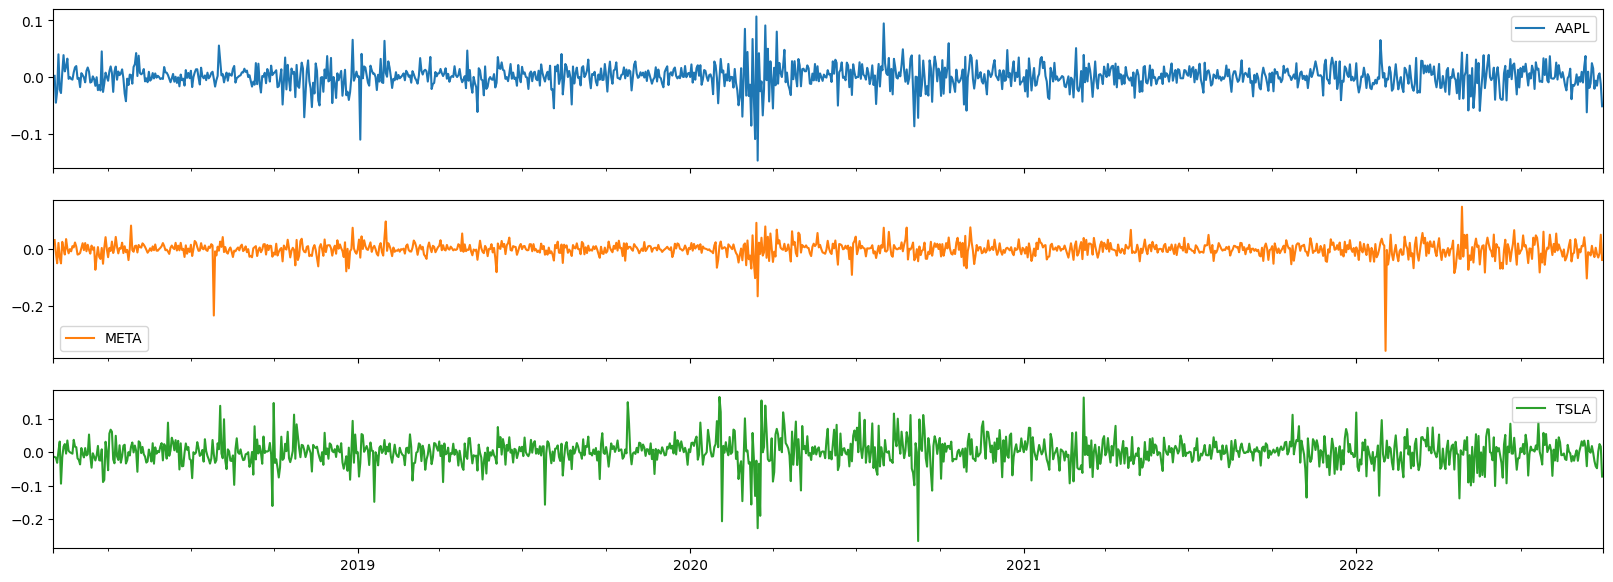

In [41]:
returns.plot(figsize=(20,7),subplots=True)


In [ ]:
## kfold -> randomforest classifier

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(returns[0],returns,test_size=0.3)

#
# Create an instance of Pipeline
#
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))

#
# Create an instance of StratifiedKFold which can be used to get indices of different training and test folds
#
strtfdKFold = StratifiedKFold(n_splits=10)
kfold = strtfdKFold.split(X_train, y_train)
scores = []